<a href="https://colab.research.google.com/github/iciac/PatternFlow/blob/topic-algorithms/cg_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf 

print(tf.version)

<module 'tensorflow_core._api.v2.version' from '/tensorflow-2.0.0-rc2/python3.6/tensorflow_core/_api/v2/version/__init__.py'>


In [0]:

def tf_intensity_range(image,range_values='image',clip_negative=False): 
    """
    Doc-string 
    """ 
    #print('image',image.shape)
    #print('range_values',range_values)
    #print('clip_negative',clip_negative)


    tf_dtype =tf.as_dtype(image.dtype) 
    tf_image = tf.convert_to_tensor(image,dtype=tf_dtype) 
    
    if range_values == 'dtype': 
        print('dtype', tf_dtype)
        #range_values = tf_image.dtype
        i_min, i_max = tf_dtype.limits 
        print(i_min)
        if clip_negative:
            i_min = 0 
        
    if range_values == 'image': 
        print('image')
        i_min = tf.reduce_min(tf_image)
        i_max = tf.reduce_max(tf_image) 

    #elif range_values in tf.dtypes: #DTYPE_RANGE: 
     #   print('elif')
        

    elif type(range_values) is tuple: 
        print('else')
        print(range_values)
        i_min, i_max = range_values 
        
    return i_min, i_max 
    
    

In [0]:
def tf_rescale_intensity(image,in_range='image',out_range='dtype'): 
    
    """ 
    Doc-string 
    """
    tf_dtype = tf.as_dtype(image.dtype) 
    #print(tf_dtype)
    tf_image = tf.convert_to_tensor(image,dtype=tf_dtype) 
    #print(tf_image.dtype)
    
    imin, imax = tf_intensity_range(image,in_range) 
    print(imin,imax)

    omin, omax = tf_intensity_range(image,out_range,clip_negative=imin>0)
    print(omin,omax)

    print(imin,imax)
    #print(tf_image)

    imin = tf.cast(imin,tf.float32)
    imax = tf.cast(imax,tf.float32)
    tf_image = tf.cast(tf_image,tf.float32)

    image = tf.clip_by_value(tf_image,clip_value_min=imin,clip_value_max=imax)

    #image = tf.maximum(imin,tf.minimum(tf_image,imax))  # np.clip(image,imin,imax) 
    
    if imin != imax: 
        image = (image-imin)/(imax-imin) 
        
    return tf.cast(tf.constant(tf_image*(omax-omin)+omin,dtype=tf.float32),dtype=tf_dtype)

Original
image
tf.Tensor(0, shape=(), dtype=uint8) tf.Tensor(255, shape=(), dtype=uint8)
dtype <dtype: 'uint8'>
0
0 255
tf.Tensor(0, shape=(), dtype=uint8) tf.Tensor(255, shape=(), dtype=uint8)


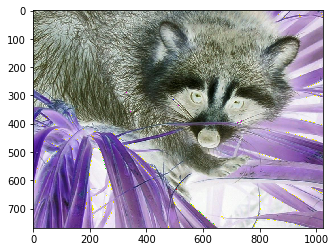

In [73]:
import matplotlib.pyplot as plt 
from scipy import misc
# uses the default scipy raccoon face as the example image 

def main(): 
    """
    Performs a test using the scipy raccoon face as an example image.
    Then calls intensity_test. 
    """ 

    face = misc.face()
    print('Original')
    plt.imshow(face)
    
    image = face # example image 
    intensity_test = tf_rescale_intensity(image) 
    plt.imshow(intensity_test)

main()